In [1]:
import pandas as pd
import numpy as np
import os 

data_path = "E:\page_ds\catnoost_step_by_step"
pict_path = os.path.join(data_path, r"foto")

MainData = pd.read_csv(os.path.join(data_path, "train.csv"))

print(MainData.shape)
print(MainData.info())


(300000, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cat10   300000 non-null  object 
 12  cat11   300000 non-null  object 
 13  cat12   300000 non-null  object 
 14  cat13   300000 non-null  object 
 15  cat14   300000 non-null  object 
 16  cat15   300000 non-null  object 
 17  cat16   300000 non-null  object 
 18  cat17   300000 non-null  object 
 19  cat18   300000 non-null  object 
 20  cont0   300000 non-null  float64
 2

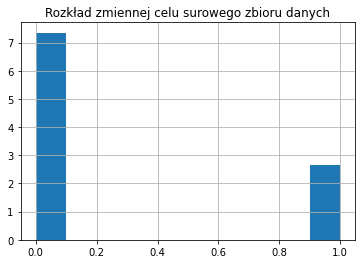

In [5]:
import matplotlib.pyplot as plt
MainData['target'].hist(density = True)
plt.title("Rozkład zmiennej celu surowego zbioru danych")
plt.savefig(os.path.join(pict_path,"1_target_histogram.png"), format="png" , dpi=300, facecolor="White")

Accuracy dla zbioru testowego: 0.8437
Accuracy dla zbioru treningowego: 0.8435
Wartość parametru Gini na zbiorze walidacyjnym to: 0.7637
Wartość parametru Gini na zbiorze treningowym to: 0.7649

ROC Curve

Confusion Matrix


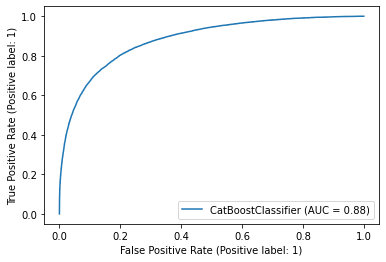

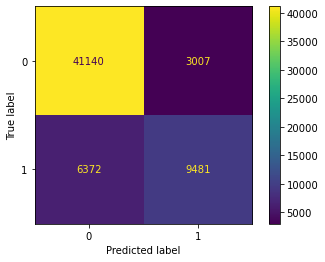

In [21]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score, roc_auc_score, RocCurveDisplay, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_tmp = MainData['target'].copy()
X_tmp = MainData.drop(columns=['id','target']).copy()

Xm_cat_col = list(Xm_train.loc[:,Xm_train.dtypes!=np.number].columns)

Xm_train, Xm_test, ym_train, ym_test = train_test_split(X_tmp,y_tmp, test_size=0.2, random_state=128)

#parametryzujemy model
cbc = CatBoostClassifier(n_estimators=100,
                         loss_function='Logloss',
                         learning_rate=0.1,
                         depth=3, task_type='GPU',
                         random_state=128262,
                         verbose=False)

# konsertujemy zbiory do typu Pool 
pool_train = Pool(Xm_train, ym_train,
                  cat_features = Xm_cat_col)

pool_test = Pool(Xm_test, cat_features = Xm_cat_col)
cbc.fit(pool_train)
y_hat = cbc.predict(pool_test)

# i teraz seria wyświetleń oraz miar jakości modelu
auc_val = roc_auc_score(ym_test, cbc.predict_proba(Xm_test)[:, 1])
auc_train = roc_auc_score(ym_train, cbc.predict_proba(Xm_train)[:, 1])

print("Accuracy dla zbioru testowego: {0:.4f}".format(accuracy_score(ym_test, y_hat)))
print("Accuracy dla zbioru treningowego: {0:.4f}".format(accuracy_score(ym_train, cbc.predict(Xm_train))))

print("Wartość parametru Gini na zbiorze walidacyjnym to: {0:.4f}".format(2*auc_val-1)) # Gini = 2*AUC-1
print("Wartość parametru Gini na zbiorze treningowym to: {0:.4f}".format(2*auc_train-1)) # Gini = 2*AUC-1

print("\nROC Curve")
print(RocCurveDisplay.from_estimator(cbc, Xm_test, ym_test))
#RocCurveDisplay.from_estimator(cbc, Xm_test, ym_test)
#plt.savefig(os.path.join(pict_path,"1_ROC_curve.png"), format="png" , dpi=300, facecolor="White")

print("\nConfusion Matrix")
#print(plot_confusion_matrix(xgb_clf, X_test, y_test))
cm = confusion_matrix(ym_test, y_hat, labels=cbc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=cbc.classes_)
print(disp.plot())
#wyk = disp.plot()
#plt.savefig(os.path.join(pict_path,"1_confusion_matrix.png"), format="png" , dpi=300, facecolor="White")
plt.show()
